In [1]:
from lenslikelihood.power_spectra import *
mass_function_model = 'shethTormen'
normalization = 'As'
pivot_string = '1'
pivot = 1.0

structure_formation_interp_As = load_interpolated_mapping(mass_function_model, pivot_string)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15

In [2]:
from lenslikelihood.measurements import *
from lenslikelihood.sampling import InterpolatedLikelihood
import dill as pickle
from trikde.pdfs import DensitySamples, IndepdendentLikelihoods, MultivariateNormalPriorHyperCube, CustomPriorHyperCube

nbins = 20
param_names = ['LOS_normalization', 'beta', 'log10c0', 'delta_power_law_index', 'sigma_sub']
param_ranges = [all_param_ranges_version2[name] for name in param_names]
load_from_pickle = True 
save_to_pickle = False 

filename_extension = '_joint_logprior'
base_path = './../lenslikelihood/precomputed_likelihoods/'
likelihoods = []
for lens in all_lens_names:
    fname = base_path + lens + filename_extension
    print('loading joint likelihoods for lens '+lens+' ...')
    f = open(fname, 'rb')
    single_lens_likelihood = pickle.load(f)
    f.close()
    likelihoods.append(single_lens_likelihood)
    
likelihood_noprior = IndepdendentLikelihoods(likelihoods)

loading joint likelihoods for lens HE0435 ...
loading joint likelihoods for lens WGD2038 ...
loading joint likelihoods for lens B1422 ...
loading joint likelihoods for lens WFI2033 ...
loading joint likelihoods for lens PSJ1606 ...
loading joint likelihoods for lens WFI2026 ...
loading joint likelihoods for lens RXJ0911 ...
loading joint likelihoods for lens MG0414 ...
loading joint likelihoods for lens PG1115 ...
loading joint likelihoods for lens RXJ1131 ...
loading joint likelihoods for lens WGDJ0405 ...


## Priors on the subhalo and field halo mass functions

A reasonable assumption to impose on the inference is that the number of subhalos varies proportionally with the number of field halos, since subhalos are accreted from the field. We can enforce this by choosing an expected amplitude for the subhalo mass function in $\Lambda$CDM, and then coupling variations to $\Sigma_{\rm{sub}}$ around this value to $\delta_{\rm{LOS}}$. 

In [3]:
def couple_mass_functions(samples, sigma_sub_theory=0.025, coupling_strength=0.2):
    
    delta_los_samples = samples[:, 0]
    sigma_sub_samples = samples[:, -1]
    delta_sigma_sub = sigma_sub_samples/sigma_sub_theory
    chi2 = (delta_sigma_sub - delta_los_samples)**2/coupling_strength**2 
    return chi2

extrapolate_likelihood = True
sigma_sub_theory = 0.05

kwargs_prior = {'sigma_sub_theory': sigma_sub_theory}
prior_on_mass_functions = CustomPriorHyperCube(couple_mass_functions, param_names, param_ranges, nbins, kwargs_prior)

likelihood = IndepdendentLikelihoods(likelihoods + [prior_on_mass_functions])
interpolated_lens_likelihood = InterpolatedLikelihood(likelihood, param_names, param_ranges, extrapolate=extrapolate_likelihood)

### Plot the likelihood

First we show the likelihood as inferred from the lenses with no additional modeling assumptions

/Users/danielgilman/.local/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


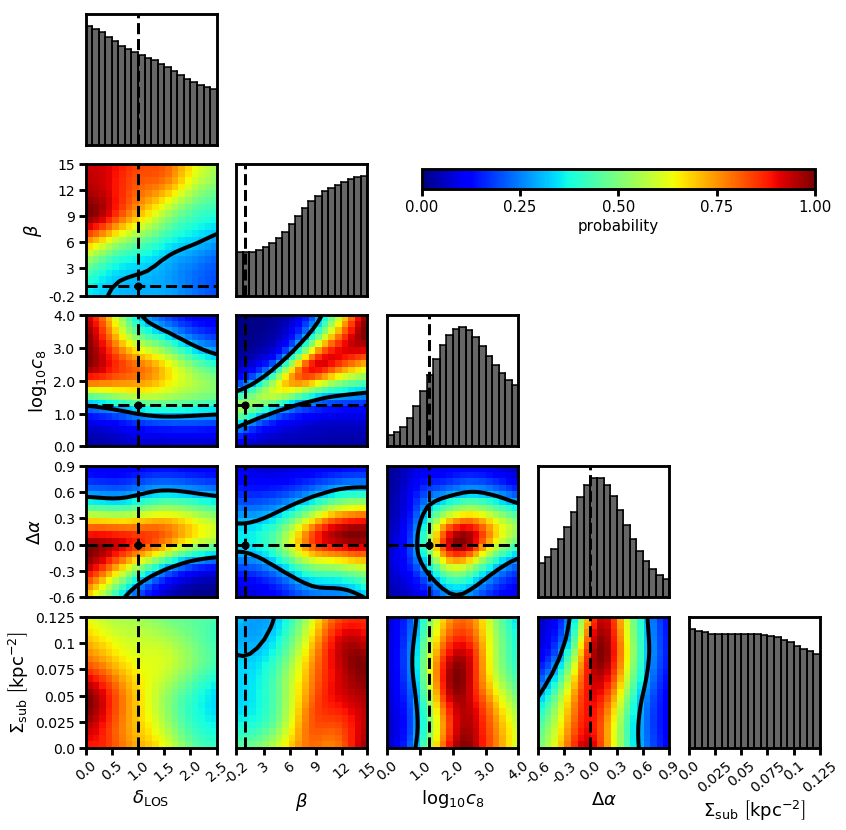

In [4]:
from trikde.triangleplot import TrianglePlot
fig = plt.figure()
cmap = 'jet'
triangle_plot = TrianglePlot([likelihood_noprior])
triangle_plot.set_cmap(cmap, marginal_col='k')
triangle_plot.truth_color = 'k'
truths = {'sigma_sub': 1.05, 'LOS_normalization': 1., 'beta': 0.85, 'log10c0': np.log10(18.5), 'delta_power_law_index': 0.}
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=False, contour_alpha=1.,
                                  contour_colors=['k', 'k'],
                                  show_contours=True, contour_levels=[0.32], truths=truths)

beta = r'$\beta$'
beta_ticks = [-0.2, 3, 6, 9, 12, 15]
c0 = r'$\log_{10} c_8$'
c0_ticks = [0., 1.0, 2.0, 3.0, 4.0]
delta_power_law_index = r'$\Delta \alpha$'
dpli_ticks = [-0.6, -0.3, 0., 0.3, 0.6, 0.9]
sigma_sub = r'$\Sigma_{\rm{sub}} \ \left[\rm{kpc^{-2}}\right]$'
sigma_sub_ticks = [0., 0.025, 0.05, 0.075, 0.1, 0.125]
delta_LOS = r'$\delta_{\rm{LOS}}$'
dlos_ticks = [0.0, 0.5, 1., 1.5, 2., 2.5]
ticksize = 14
labelsize = 18
rotation = 40

axes[5].set_ylabel(beta, fontsize=labelsize)
axes[5].set_yticks(beta_ticks)
axes[5].set_yticklabels(beta_ticks, fontsize=ticksize)

axes[10].set_ylabel(c0, fontsize=labelsize)
axes[10].set_yticks(c0_ticks)
axes[10].set_yticklabels(c0_ticks, fontsize=ticksize)

axes[15].set_ylabel(delta_power_law_index, fontsize=labelsize)
axes[15].set_yticks(dpli_ticks)
axes[15].set_yticklabels(dpli_ticks, fontsize=ticksize)

axes[20].set_ylabel(sigma_sub, fontsize=labelsize)
axes[20].set_yticks(sigma_sub_ticks)
axes[20].set_yticklabels(sigma_sub_ticks, fontsize=ticksize)

axes[20].set_xlabel(delta_LOS, fontsize=labelsize)
axes[20].set_xticks(dlos_ticks)
axes[20].set_xticklabels(dlos_ticks, fontsize=ticksize, rotation=rotation)

axes[21].set_xlabel(beta, fontsize=labelsize)
axes[21].set_xticks(beta_ticks)
axes[21].set_xticklabels(beta_ticks, fontsize=ticksize, rotation=rotation)

axes[22].set_xlabel(c0, fontsize=labelsize)
axes[22].set_xticks(c0_ticks)
axes[22].set_xticklabels(c0_ticks, fontsize=ticksize, rotation=rotation)


axes[23].set_xlabel(delta_power_law_index, fontsize=labelsize)
axes[23].set_xticks(dpli_ticks)
axes[23].set_xticklabels(dpli_ticks, fontsize=ticksize, rotation=rotation)

axes[24].set_xlabel(sigma_sub, fontsize=labelsize)
axes[24].set_xticks(sigma_sub_ticks)
axes[24].set_xticklabels(sigma_sub_ticks, fontsize=ticksize, rotation=rotation)

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ax_idx = 9
axins1 = inset_axes(axes[ax_idx],
                    width="300%",  # width = 50% of parent_bbox width
                    height="15%",  # height : 5%
                    loc='upper right')
empty = np.zeros((20, 20))
empty[0,0] = 1

im1 = axes[ax_idx].imshow(empty, interpolation='None', cmap=cmap)
cb = fig.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[0, 0.25, 0.5, 0.75, 1])
axes[ax_idx].set_visible(False)
cb.set_label('probability', fontsize=15)
#plt.savefig('./figures/lensing_likelihood.pdf')


### Likelihood with a prior

Now we show the likelihood after adding the prior coupling $\Sigma_{\rm{sub}}$ to $\delta_{LOS}$, assuming $\Sigma_{\rm{sub}} = 0.05 \rm{kpc^{-1}}$ in $\Lambda$CDM, corresponding to doubly efficient tidal disruption of halos between in the Milky Way relative to massive ellipticals

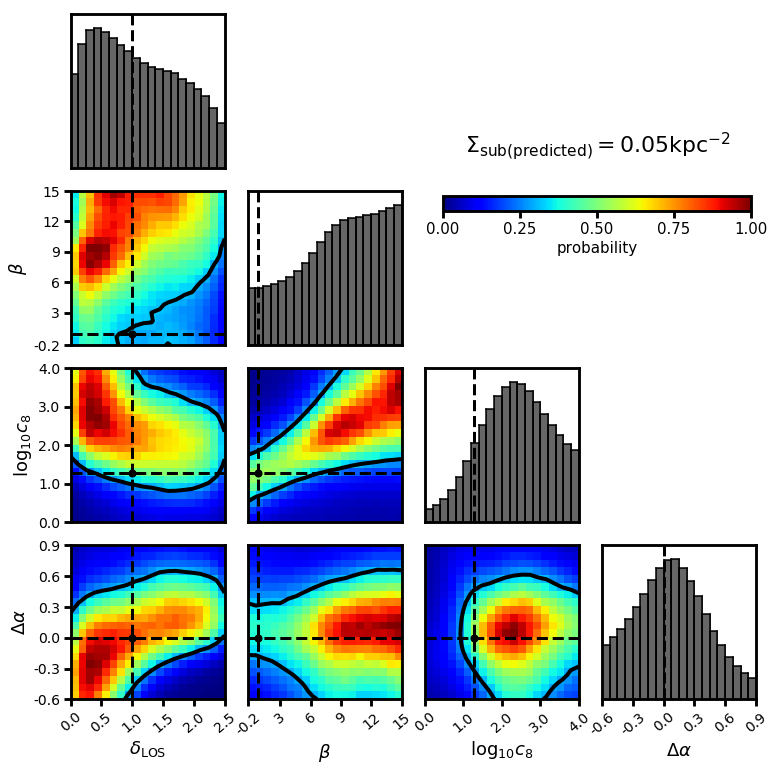

In [5]:
fig = plt.figure()
triangle_plot = TrianglePlot([likelihood])
triangle_plot.set_cmap(cmap, marginal_col='k')
triangle_plot.truth_color = 'k'
truths= {'sigma_sub': 1.05, 'LOS_normalization': 1., 'beta': 0.85, 'log10c0': np.log10(18.5), 'delta_power_law_index': 0.}
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=False, show_contours=True,
                                  contour_levels=[0.32], contour_colors=['k', 'k'],
                                 display_params=['LOS_normalization', 'beta', 'log10c0', 'delta_power_law_index'],
                                 truths=truths)

axes[4].set_ylabel(beta, fontsize=labelsize)
axes[4].set_yticks(beta_ticks)
axes[4].set_yticklabels(beta_ticks, fontsize=ticksize)

axes[8].set_ylabel(c0, fontsize=labelsize)
axes[8].set_yticks(c0_ticks)
axes[8].set_yticklabels(c0_ticks, fontsize=ticksize)

axes[12].set_ylabel(delta_power_law_index, fontsize=labelsize)
axes[12].set_yticks(dpli_ticks)
axes[12].set_yticklabels(dpli_ticks, fontsize=ticksize)

axes[12].set_xlabel(delta_LOS, fontsize=labelsize)
axes[12].set_xticks(dlos_ticks)
axes[12].set_xticklabels(dlos_ticks, fontsize=ticksize, rotation=rotation)

axes[13].set_xlabel(beta, fontsize=labelsize)
axes[13].set_xticks(beta_ticks)
axes[13].set_xticklabels(beta_ticks, fontsize=ticksize, rotation=rotation)

axes[14].set_xlabel(c0, fontsize=labelsize)
axes[14].set_xticks(c0_ticks)
axes[14].set_xticklabels(c0_ticks, fontsize=ticksize, rotation=rotation)

axes[15].set_xlabel(delta_power_law_index, fontsize=labelsize)
axes[15].set_xticks(dpli_ticks)
axes[15].set_xticklabels(dpli_ticks, fontsize=ticksize, rotation=rotation)

axes[2].annotate(r'$\Sigma_{\rm{sub(predicted)}} = 0.05 \rm{kpc^{-2}}$', fontsize=22,
                xy=(0.26, 0.1), xycoords='axes fraction')
ax_idx = 7
axins1 = inset_axes(axes[ax_idx],
                    width="200%",  # width = 50% of parent_bbox width
                    height="10%",  # height : 5%
                    loc='upper right')
empty = np.zeros((20, 20))
empty[0,0] = 1

im1 = axes[ax_idx].imshow(empty, interpolation='None', cmap=cmap)
cb = fig.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[0, 0.25, 0.5, 0.75, 1])
axes[ax_idx].set_visible(False)
cb.set_label('probability', fontsize=15)

#plt.savefig('./figures/lensing_likelihood_w.pdf')

## Systematic modeling errors

We allow for systematic errors in the model by changing the internal mapping between the parameters describing the mass function and concentration-mass relation

In [7]:
error_type = 'INTERPOLATED_GRID'

if error_type == 'INTERPOLATED_GRID':
    
    f = open('./systematic_error_interpolations/systematic_error_interpolation_lowfit_'+mass_function_model+'_pivot'+pivot_string+'_3D', 'rb')
    systematic_interp_lowfit = pickle.load(f)
    f.close()

    f = open('./systematic_error_interpolations/systematic_error_interpolation_highfit_'+mass_function_model+'_pivot'+pivot_string+'_3D', 'rb')
    systematic_interp_highfit = pickle.load(f)
    f.close()
    
elif error_type == 'RELATIVE':
    delta_delta_los = 0.1
    delta_beta = 0.2
    delta_c8 = 0.2
    delta_delta_alpha = 0.05

## Final setup

In [10]:
delta_los_range = [0., 2.5]
beta_range = [-0.2, 15.]
log10c0_range = [0., 4.]
delta_alpha_range = [-0.6, 0.9]
sigma_sub_range = [0., 0.125]
param_ranges_lensing = [delta_los_range, beta_range, log10c0_range, delta_alpha_range, sigma_sub_range]
n_draw = 50000
extrapolate_ranges = [[0., 2.5], 
                     [-0.2, 15.],
                     [0., 4.0], 
                     delta_alpha_range,
                     sigma_sub_range]

param_ranges_pk = [[0.4645, 1.4645], [-0.2, 0.2], [-0.018, 0.018]]
arun_ticks = [-0.16, -0.08, 0.00, 0.08, 0.16]
brun_ticks = [-0.014, -0.007, 0.000, 0.007, 0.014]
ns_ticks = [0.5645, 0.9645, 1.3645]

## Compute the likelihood of the power spectrum parameters

We can compute the likelihood the parameters describing $P\left(k\right)$, adding systematic models errors by hand

In [11]:
if error_type == 'INTERPOLATED_GRID':
    
    samples_no_sys, like_no_sys = sample_power_spectra_with_systematic_interp(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    systematic_interp_highfit, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges, log10c8_sys=False, delta_los_sys=False,
                                                                             delta_alpha_sys=False, beta_sys=False, three_D=True)
    
    samples_sys1, like_sys1 = sample_power_spectra_with_systematic_interp(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    systematic_interp_lowfit, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges, three_D=True)

    samples_sys2, like_sys2 = sample_power_spectra_with_systematic_interp(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    systematic_interp_highfit, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges, three_D=True)


    samples_sys_noamp_1, like_sys_noamp_1 = sample_power_spectra_with_systematic_interp(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    systematic_interp_lowfit, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges, log10c8_sys=False, delta_los_sys=False, three_D=True)

    samples_sys_noamp_2, like_sys_noamp_2 = sample_power_spectra_with_systematic_interp(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    systematic_interp_highfit, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges, log10c8_sys=False, delta_los_sys=False, three_D=True)

    samples_sys_noslope, like_sys_noslope = sample_power_spectra_with_systematic_interp(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    systematic_interp_lowfit, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges, delta_alpha_sys=False, beta_sys=False, three_D=True)
    
elif error_type == 'RELATIVE':
    
    samples_sys1, like_sys1 = sample_power_spectra(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    delta_c8, delta_beta, delta_delta_los, delta_delta_alpha, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges)

    samples_sys2, like_sys2 = sample_power_spectra(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    -delta_c8, -delta_beta, -delta_delta_los, -delta_delta_alpha, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges)

    samples_no_sys, like_no_sys = sample_power_spectra(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                                   0., 0., 0., 0., extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges)

    samples_sys_noamp_1, like_sys_noamp_1 = sample_power_spectra(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    0., delta_beta, 0., delta_delta_alpha, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges)

    samples_sys_noamp_2, like_sys_noamp_2 = sample_power_spectra(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    0., -delta_beta, 0., delta_delta_alpha, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges)

    samples_sys_noslope, like_sys_noslope = sample_power_spectra(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    -delta_c8, 0., 0., 0., extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges)
    
    samples_sys_noslope_2, like_sys_noslope_2 = sample_power_spectra(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    delta_c8, 0., 0., 0., extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges)
    
    
    

## Plot the likelihood of the parameters describing the power spectrum

In [ ]:
nbins = 20
param_names_pk = [r'$n_s$', r'$a_{\rm{run}}$', r'$b_{\rm{run}}$'] 

samples_marginalized = np.vstack((np.vstack((np.vstack((np.vstack((np.vstack((samples_no_sys, samples_sys1)), samples_sys2)), samples_sys_noamp_1)), samples_sys_noamp_2)), samples_sys_noslope))
likelihood_marginalized = np.append(np.append(np.append(np.append(np.append(like_no_sys, like_sys1), like_sys2), like_sys_noamp_1), like_sys_noamp_2), like_sys_noslope)
# samples_marginalized = samples_no_sys
# likelihood_marginalized = like_no_sys
density_marginalized = DensitySamples(samples_marginalized, param_names_pk, likelihood_marginalized, 
                                 param_ranges_pk, nbins=nbins, use_kde=False, bandwidth_scale=1.)
pk_likelihood_marginalized = IndepdendentLikelihoods([density_marginalized])

triplot = TrianglePlot([pk_likelihood_marginalized])
cmap = 'jet'
triplot.set_cmap(cmap, marginal_col='k')
triplot.truth_color = 'k'
truths= {r'$n_s$': 0.9645, r'$a_{\rm{run}}$': 0., r'$b_{\rm{run}}$': 0.}
axes = triplot.make_triplot(filled_contours=False, show_intervals=False, show_contours=True,
                                  contour_levels=[0.32], contour_colors=['k', 'k'])

axes[3].set_yticks(arun_ticks)
axes[3].set_yticklabels(arun_ticks, fontsize=ticksize)

axes[6].set_yticks(brun_ticks)
axes[6].set_yticklabels(brun_ticks, fontsize=ticksize)

axes[6].set_xticks(ns_ticks)
axes[6].set_xticklabels(ns_ticks, fontsize=ticksize)

axes[7].set_xticks(arun_ticks)
axes[7].set_xticklabels(arun_ticks, fontsize=ticksize)

axes[8].set_xticks(brun_ticks)
axes[8].set_xticklabels(brun_ticks, fontsize=ticksize)

ax_idx = 1
axins1 = inset_axes(axes[ax_idx],
                    width="200%",  # width = 50% of parent_bbox width
                    height="10%",  # height : 5%
                    loc=6)
empty = np.zeros((20, 20))
empty[0,0] = 1

im1 = axes[ax_idx].imshow(empty, interpolation='None', cmap=cmap)
cb = fig.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[0, 0.25, 0.5, 0.75, 1])
axes[ax_idx].set_visible(False)
cb.set_label('probability', fontsize=15)
plt.savefig('./figures/qP_likelihood_'+mass_function_model+'_pivot'+pivot_string+'.pdf')

import pickle
f = open('./interpolated_pq_likelihoods/Pk_likelihood_'+mass_function_model+'_pivot'+pivot_string, 'wb')
pk_likelihood_marginalized_interp = InterpolatedLikelihood(pk_likelihood_marginalized, param_names_pk, param_ranges_pk)
pickle.dump(pk_likelihood_marginalized_interp, f)


In [8]:
f = open('./interpolated_pq_likelihoods/Pk_likelihood_'+mass_function_model+'_pivot'+pivot_string, 'rb')
pk_likelihood_marginalized_interp = pickle.load(f)


## Compute the likelihood, prior, and posterior distribution of $P_{30}$

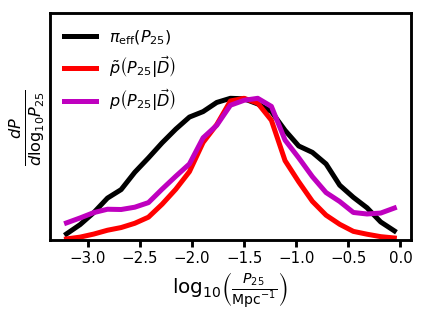

In [13]:
n_bins_hist = 25
edge_cut_factor = 10
pk_no_sys, p100_likelihood_no_sys, x, prior_no_sys, posterior_no_sys = Pk_from_likelihood(samples_no_sys, like_no_sys, pivot, nbins=n_bins_hist, k_eval=25, edge_cut_factor=edge_cut_factor, n_max=5000)
pk_sys1, p100_likelihood_sys1, x, _, posterior_sys1 = Pk_from_likelihood(samples_sys1, like_sys1, pivot, nbins=n_bins_hist, k_eval=25, edge_cut_factor=edge_cut_factor, n_max=5000)
pk_sys2, p100_likelihood_sys2, x, _, posterior_sys2 = Pk_from_likelihood(samples_sys2, like_sys2, pivot, nbins=n_bins_hist, k_eval=25, edge_cut_factor=edge_cut_factor, n_max=5000)
pk_sys_noamp_1, p100_likelihood_sys_noamp_1, x, _, posterior_sys_noamp_1 = Pk_from_likelihood(samples_sys_noamp_1, like_sys_noamp_1, pivot, nbins=n_bins_hist, k_eval=25, edge_cut_factor=edge_cut_factor, n_max=5000)
pk_sys_noamp_2, p100_likelihood_sys_noamp_2, x, _, posterior_sys_noamp_2 = Pk_from_likelihood(samples_sys_noamp_2, like_sys_noamp_2, pivot, nbins=n_bins_hist, k_eval=25, edge_cut_factor=edge_cut_factor, n_max=5000)
pk_sys_noslope, p100_likelihood_sys_noslope, x_30, _, posterior_sys_noslope = Pk_from_likelihood(samples_sys_noslope, like_sys_noslope, pivot, nbins=n_bins_hist, k_eval=25, edge_cut_factor=edge_cut_factor, n_max=5000)
total_posterior_30 = posterior_no_sys + posterior_sys1 + posterior_sys2 + posterior_sys_noamp_1 + posterior_sys_noamp_2 + posterior_sys_noslope
total_posterior_30 *= np.max(total_posterior_30) ** -1
total_likelihood_30 = p100_likelihood_no_sys + p100_likelihood_sys1 + p100_likelihood_sys2 + p100_likelihood_sys_noamp_1 + p100_likelihood_sys_noamp_2 + p100_likelihood_sys_noslope
total_likelihood_30 *= np.max(total_likelihood_30) ** -1
combinations_30 = [p100_likelihood_no_sys, p100_likelihood_sys1, p100_likelihood_sys2, p100_likelihood_sys_noamp_1, 
                p100_likelihood_sys_noamp_2, p100_likelihood_sys_noslope]

fig = plt.figure(2)
fig.set_size_inches(6,4.5)
ax = plt.subplot(111)
ax.plot(x, prior_no_sys, color='k', lw=5, label=r'$\pi_{\rm{eff}}\left(P_{25}\right)$')
ax.plot(x, total_posterior_30, color='r', lw=5, label=r'$\tilde{p}\left(P_{25} | \vec{D}\right)$')
ax.plot(x, total_likelihood_30, color='m', lw=5, label=r'$p\left(P_{25} | \vec{D}\right)$')
ax.legend(fontsize=16, loc=2, frameon=False)

ax.set_yticklabels('off')
ax.set_yticks([])
ax.set_xlabel(r'$\log_{10}\left(\frac{P_{25}}{\rm{Mpc^{-1}}}\right)$', fontsize=20)
ax.set_ylabel(r'$\frac{d P}{d \log_{10} P_{25}}$', fontsize=23)
ax.set_ylim(0, 1.6)

plt.tight_layout()
plt.savefig('./figures_for_paper/likelihood_prior_posterior_25_'+mass_function_model+'_pivot'+pivot_string+'.pdf')

## Now including systematics

Now add the modeling systematics, and compute the final likelihood by averaging over the differnt PDFs

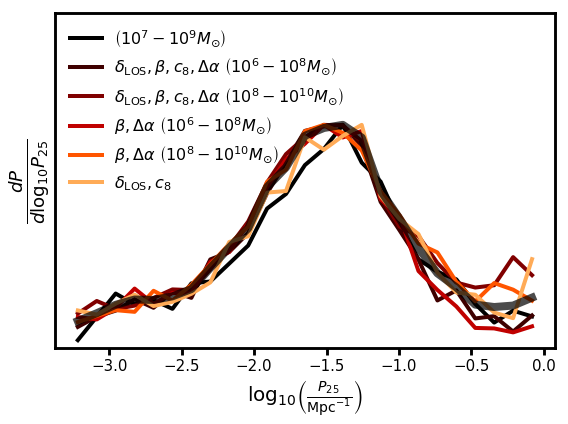

In [15]:
import matplotlib.cm
from scipy.interpolate import interp1d

fig = plt.figure(1)
fig.set_size_inches(8,6)
ax = plt.subplot(111)
total = 0
mid_range = r'$\left(10^7 - 10^{9} M_{\odot}\right)$'
low_range = r'$\left(10^6 - 10^{8} M_{\odot}\right)$'
high_range = r'$\left(10^8 - 10^{10} M_{\odot}\right)$'
lab = [mid_range, 
       r'$\delta_{\rm{LOS}}, \beta, c_8, \Delta \alpha \ $'+low_range,
      r'$\delta_{\rm{LOS}}, \beta, c_8, \Delta \alpha \ $'+high_range,
      r'$\beta, \Delta \alpha \ $'+low_range,
      r'$\beta, \Delta \alpha \ $'+high_range,
      r'$\delta_{\rm{LOS}}, c_8 \ $']
color_norm = len(combinations_30)
cmap = cm.get_cmap('gist_heat')

for i, comb in enumerate(combinations_30):
    total += comb
    
    ax.plot(x_30, comb, color=cmap(i/color_norm), label=lab[i], lw=4., alpha=1.)
ax.set_yticklabels('off')
ax.set_yticks([])
ax.set_xlabel(r'$\log_{10}\left(\frac{P_{25}}{\rm{Mpc^{-1}}}\right)$', fontsize=20)
ax.set_ylabel(r'$\frac{d P}{d \log_{10} P_{25}}$', fontsize=26)
ax.set_ylim(0, 1.5)
ax.legend(fontsize=16, frameon=False, loc=2)
total *= np.max(total) ** -1
ax.plot(x_30, total, color='k', lw=8, alpha=0.7)
total_interp = interp1d(x_30, total)
samples_from_total = []
while len(samples_from_total) < 5000:
    u = np.random.rand()
    xi = np.random.uniform(x_30[0], x_30[-1])
    p = total_interp(xi)
    if p > u:
        samples_from_total.append(xi)
samples_from_total_20 = np.array(samples_from_total)
plt.tight_layout()
plt.savefig('./figures_for_paper/final_likelihood_25_'+mass_function_model+'_pivot'+pivot_string+'.pdf')

In [ ]:
print('log10(P_10) = ', np.log10(mu))
print('plus: ', -np.log10(mu) + np.log10(pk_upper_68))
print('minus: ', np.log10(mu) - np.log10(pk_lower_68))